In [10]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, explained_variance_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import RidgeCV
import matplotlib.pyplot as plt
#TODO: read tf documentation on what the static_rnn does
#do I want to one hot encode the data? or already too many dimensions

In [11]:
#open files, they have not been normalized yet
dffile = open('masdfr4m7170321s1.pkl',"rb")
dyfile = open('r4m7170321s1.pkl', "rb")
df = pickle.load(dffile)
df = df.drop(columns='pupilCurr', axis=1)
df = df.drop(columns='pupilPeri', axis=1)
df = df[["stimType", "intensity", "wheelPeri", 'responseT','response','whiskPeri', 'lastStimT', 'pupilMovement', 'vidPeri']]
df = df.interpolate()
dy = pickle.load(dyfile)
print(df)

       stimType  intensity  wheelPeri  responseT  response  whiskPeri  \
0           1.0        1.0   0.063139   0.000000       0.0  14.552863   
1           1.0        1.0   0.042104   0.000000       0.0  14.552863   
2           1.0        1.0   0.021054   0.000000       0.0  15.113848   
3           1.0        1.0   0.000000   0.000000       0.0  16.180270   
4           1.0        1.0   0.000000   0.000000       0.0  16.180270   
5           1.0        1.0   0.021033   0.000000       0.0  14.880170   
6           1.0        1.0   0.042019   0.000000       0.0  12.050519   
7           1.0        1.0   0.042019   0.000000       0.0  10.615381   
8           1.0        1.0   0.042019   0.000000       0.0  10.139014   
9           1.0        1.0   0.020985   0.000000       0.0  11.232759   
10          1.0        1.0   0.000000   0.000000       0.0  12.599183   
11          1.0        1.0   0.000000   0.000000       0.0  15.635679   
12          1.0        1.0   0.268166   0.000000   

In [12]:
df["YY"] = np.arange(0, len(df))
df = df.dropna(0)
y = np.empty((len(df), 22360))
y_index = 0
for ind in df["YY"]:
    y[y_index] = dy[ind]
    y_index+=1

xdf  = df.drop("YY", axis=1)

scaler = StandardScaler()
scaler.fit(xdf)
df_scaled = pd.DataFrame(scaler.transform(xdf), columns=xdf.columns)
scalerY = StandardScaler()
scalerY.fit(y)
dy = scalerY.transform(y)

In [13]:
score = 0
kf = KFold(n_splits=10, shuffle=True, random_state=1315625)
kf.get_n_splits(df_scaled)
allScore = []
avgMSE = 0
ev = 0
avgCoef = np.zeros((len(y[0]),len(xdf.columns)))
r2s = np.zeros(len(y[0]))
for train_index, test_index in kf.split(df_scaled):
    # predTifModel = LinearRegression(fit_intercept=False)
    predTifModel = RidgeCV(alphas=[0.1,.01,1,.001], fit_intercept=False)
    predTifModel.fit(df_scaled.values[train_index], dy[train_index])
    sc = predTifModel.score(df_scaled.values[test_index], dy[test_index])
    score += sc
    allScore.append(sc)
    avgCoef += predTifModel.coef_
    pred = predTifModel.predict(df_scaled.values[test_index])
    r2s += r2_score(dy[test_index], pred, multioutput='raw_values')
    avgMSE += mean_squared_error(dy[test_index], pred)
    ev += explained_variance_score(dy[test_index], pred)
avgCoef = np.divide(avgCoef,10)
r2s = np.divide(r2s, 10)
avgMSE = np.divide(avgMSE,10)
ev = np.divide(ev,10)

In [14]:
print(r2s)
print(len(r2s))
print(score/10)
print(np.average(r2s))
print(avgMSE)
print(ev)

[0.32287169 0.32924295 0.3339929  ... 0.0981404  0.0769251  0.05900642]
22360
0.3456270878505876
0.34558268306881196
0.6541704530430217
0.3457499851665305


In [15]:
def rowsToColumns(mat):
    (width, length) = mat.shape
    print(width)
    newmat = np.empty((length, width))
    for (x, row) in enumerate(mat):
        for (y, i) in enumerate(row):
            newmat[y][x] = i
    return newmat

In [16]:
print(mean_squared_error(dy[test_index], pred))
avgCoef = rowsToColumns(avgCoef)
print(len(avgCoef[0]))

0.6565254850397463
22360
22360


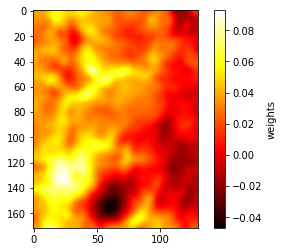

In [17]:
#["stimType", "intensity", "wheelPeri", 'responseT', 'response','whiskPeri', 'lastStimT', 'pupilMovement', 'vidPeri']
#stim type
imc = plt.imshow((avgCoef[0]).reshape(172,130), cmap='hot', interpolation='gaussian')
plt.colorbar(label='weights')

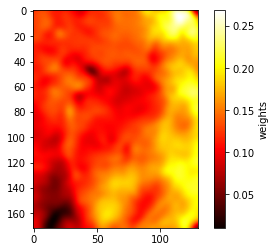

In [18]:
#intensity
imc = plt.imshow((avgCoef[1]).reshape(172,130), cmap='hot', interpolation='gaussian')
plt.colorbar(label='weights')

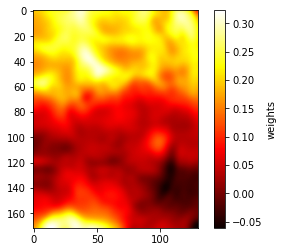

In [19]:
#wheel
imc = plt.imshow((avgCoef[2]).reshape(172,130), cmap='hot', interpolation='gaussian')
plt.colorbar(label='weights')

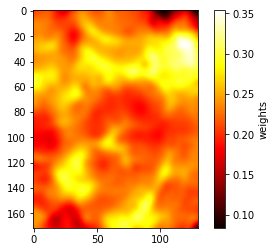

In [20]:
#response time
imc = plt.imshow((avgCoef[3]).reshape(172,130), cmap='hot', interpolation='gaussian')
plt.colorbar(label='weights')

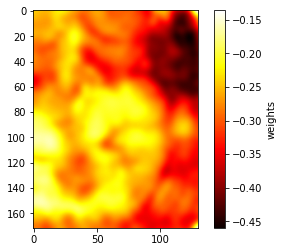

In [21]:
#response
imc = plt.imshow((avgCoef[4]).reshape(172,130), cmap='hot', interpolation='gaussian')
plt.colorbar(label='weights')

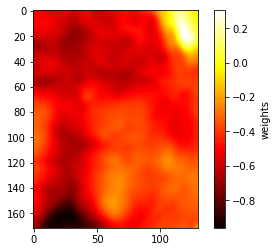

In [22]:
#whisk
imc = plt.imshow((avgCoef[5]).reshape(172,130), cmap='hot', interpolation='gaussian')
plt.colorbar(label='weights')

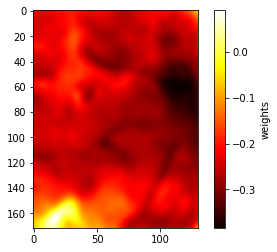

In [23]:
#last stim time
imc = plt.imshow((avgCoef[6]).reshape(172,130), cmap='hot', interpolation='gaussian')
plt.colorbar(label='weights')

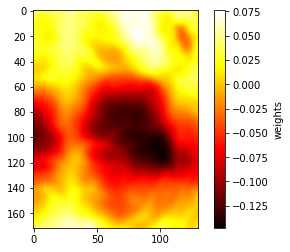

In [24]:
#'pupilMovement'
imc = plt.imshow((avgCoef[7]).reshape(172,130), cmap='hot', interpolation='gaussian')
plt.colorbar(label='weights')

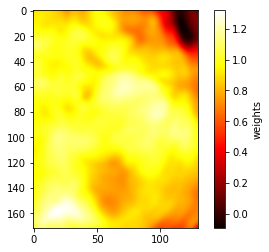

In [25]:
#vidPeri
imc = plt.imshow((avgCoef[8]).reshape(172,130), cmap='hot', interpolation='gaussian')
plt.colorbar(label='weights')

In [38]:
def plot_comparison(start_idx, length=100, train=True):
    """
    Plot the predicted and true output-signals.
    
    :param start_idx: Start-index for the time-series.
    :param length: Sequence-length to process and plot.
    :param train: Boolean whether to use training- or test-set.
    """
    
    if train:
        # Use training-data.
        x = df_scaled
        y_true = dy
    else:
        # Use test-data.
        x = df_scaled
        y_true = dy 
    
    # End-index for the sequences.
    end_idx = start_idx + length
    
    # Select the sequences from the given start-index and
    # of the given length.
    x = x[start_idx:end_idx]
    y_true = y_true[start_idx:end_idx]
    
    # Input-signals for the model.
    x = np.expand_dims(x, axis=0)
    print(x[0])

    # Use the model to predict the output-signals.
    y_pred = predTifModel.predict(x[0])
    plt.figure(figsize=(15,5))

    # Plot and compare the two signals.
    plt.plot(y_true[0][0:400], label='true')
    plt.plot(y_pred[0][0:400], label='pred')
    print("r2")
    print(explained_variance_score(y_true, y_pred))

    # Plot labels etc.
    plt.ylabel("sum")
    plt.legend()
    plt.show()

[[ 6.85070304e-01  1.24838649e+00 -4.45878205e-01 ... -1.04219141e+00
  -3.54462205e-01 -3.01769371e-02]
 [ 6.85070304e-01  1.24838649e+00 -4.49569031e-01 ... -1.03488100e+00
  -3.78697465e-01  8.12282134e-03]
 [ 6.85070304e-01  1.24838649e+00 -4.53260694e-01 ... -1.02756667e+00
  -3.42035372e-01  8.86191760e-04]
 ...
 [ 6.85070304e-01  1.24838649e+00  7.88602123e-02 ... -5.26585543e-01
   2.25599524e-02  8.98337849e-01]
 [ 6.85070304e-01  1.24838649e+00 -1.27816962e-01 ... -5.19090812e-01
   1.36328703e-01  6.83669420e-01]
 [ 6.85070304e-01  1.24838649e+00 -2.52907983e-01 ... -5.11962151e-01
   2.12027059e-01  7.02308087e-01]]
r2
0.25567048310047624


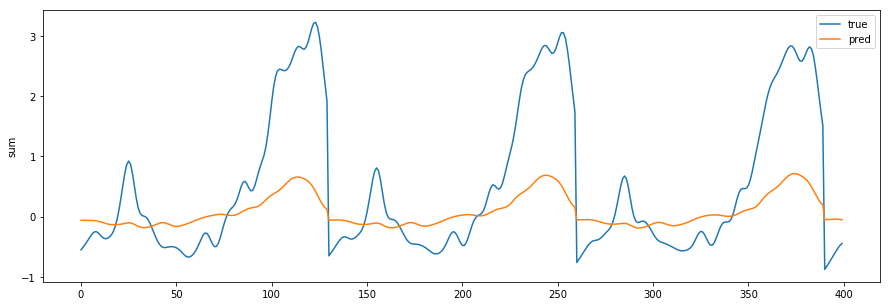

In [39]:
plot_comparison(start_idx=1, length=4000, train=False)

In [53]:
%matplotlib inline
def plot_image_difference(start_idx, length=100, train=True):
    """
    Plot the predicted and true output-signals.
    
    :param start_idx: Start-index for the time-series.
    :param length: Sequence-length to process and plot.
    :param train: Boolean whether to use training- or test-set.
    """
    
    if train:
        # Use training-data.
        x = df_scaled
        y_true = dy
    else:
        # Use test-data.
        x = df_scaled
        y_true = dy 
    
    # End-index for the sequences.
    end_idx = start_idx + length
    
    # Select the sequences from the given start-index and
    # of the given length.
    x = x.iloc[start_idx]
    y_true = y_true[start_idx]
    
    # Input-signals for the model.
    x = np.expand_dims(x, axis=0)
    print(x)

    # Use the model to predict the output-signals.
    y_pred = predTifModel.predict(x)
    plt.figure(figsize=(15,5))
    imc = plt.imshow((np.subtract(y_true, y_pred[0])).reshape(172,130), cmap='hot', interpolation='gaussian')
    plt.colorbar(label='difference')
    print("r2")
    print(explained_variance_score(y_true, y_pred[0]))

    plt.legend()
    plt.show()
    plt.figure(figsize=(15,5))
    imc = plt.imshow((y_pred[0]).reshape(172,130), cmap='hot', interpolation='gaussian')
    plt.colorbar(label='pred')


    plt.legend()
    plt.show()

    plt.figure(figsize=(15,5))
    imc = plt.imshow((y_true).reshape(172,130), cmap='hot', interpolation='gaussian')
    plt.colorbar(label='true')


    plt.legend()
    plt.show()

No handles with labels found to put in legend.


[[ 0.6850703   1.24838649 -0.4458782  -0.76012035 -0.80965573  0.74681496
  -1.04219141 -0.35446221 -0.03017694]]
r2
0.3737396674405662


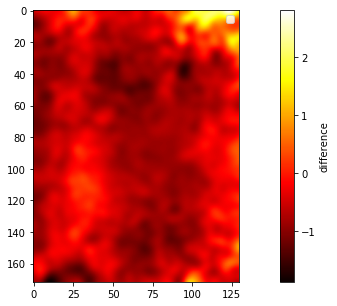

No handles with labels found to put in legend.


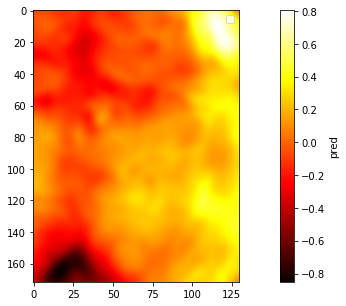

No handles with labels found to put in legend.


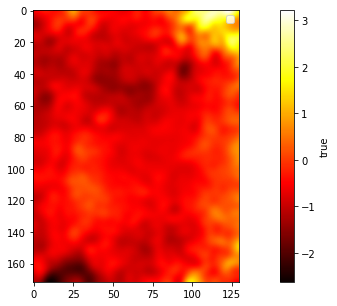

In [54]:
plot_image_difference(start_idx=1, length=4000, train=False)